<a href="https://colab.research.google.com/github/preethamcharan/x23183683_Thesis/blob/main/Thesis_CICIOT2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive to access the dataset
drive.mount('/content/drive')

# Define the path to your CSV file
CSV_PATH = '/content/drive/MyDrive/Malware1/CICIOT2023.csv'

# Load the data
df = pd.read_csv(CSV_PATH)

# Rename columns to lowercase and replace spaces with underscores
df.columns = df.columns.str.replace(" ", "_").str.lower()
print("Columns renamed for consistency:")
print(df.columns)

# Display basic information about the dataset
df.info()

Mounted at /content/drive
Columns renamed for consistency:
Index(['flow_duration', 'header_length', 'protocol_type', 'duration', 'rate',
       'srate', 'drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'http', 'https', 'dns', 'telnet',
       'smtp', 'ssh', 'irc', 'tcp', 'udp', 'dhcp', 'arp', 'icmp', 'ipv', 'llc',
       'tot_sum', 'min', 'max', 'avg', 'std', 'tot_size', 'iat', 'number',
       'magnitue', 'radius', 'covariance', 'variance', 'weight', 'label'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447625 entries, 0 to 447624
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    447625 non-null  float64
 1   header_length    447625 non-null  float64
 2   protocol_type    447625 non-n

In [ ]:
# Fix known typos in column names if needed
df = df.rename(columns={"magnitue": "magnitude"})

# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values[missing_values > 0])

# Drop unnecessary columns (e.g., protocol_type if it's not used)
df = df.drop(columns=['protocol_type'], errors='ignore')

# Display updated info to confirm cleaning
df.info()

Missing values in each column:
 Series([], dtype: int64)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447625 entries, 0 to 447624
Data columns (total 46 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    447625 non-null  float64
 1   header_length    447625 non-null  float64
 2   duration         447625 non-null  float64
 3   rate             447625 non-null  float64
 4   srate            447625 non-null  float64
 5   drate            447625 non-null  float64
 6   fin_flag_number  447625 non-null  float64
 7   syn_flag_number  447625 non-null  float64
 8   rst_flag_number  447625 non-null  float64
 9   psh_flag_number  447625 non-null  float64
 10  ack_flag_number  447625 non-null  float64
 11  ece_flag_number  447625 non-null  float64
 12  cwr_flag_number  447625 non-null  float64
 13  ack_count        447625 non-null  float64
 14  syn_count        447625 non-null  float64
 15  fin_count        447625 non-

In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate features and labels
features = df.drop(columns=['label'])
labels = df['label']

# Apply StandardScaler to the features
scaler = StandardScaler()
scaled_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Combine scaled features with labels
scaled_df = pd.concat([scaled_features, labels.reset_index(drop=True)], axis=1)
print("Data scaling complete.")

Data scaling complete.


In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

# Separate features and labels again after scaling
X = scaled_df.drop(columns=['label'])
y = scaled_df['label']

# Apply SMOTE to balance classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
balanced_df['label'] = y_resampled
print("Class balancing with SMOTE complete.")
print(balanced_df['label'].value_counts())

Class balancing with SMOTE complete.
label
DDoS-SynonymousIP_Flood    68835
VulnerabilityScan          68835
Recon-OSScan               68835
DDoS-SlowLoris             68835
DoS-HTTP_Flood             68835
DNS_Spoofing               68835
Recon-PortScan             68835
CommandInjection           68835
DictionaryBruteForce       68835
DoS-SYN_Flood              68835
DDoS-HTTP_Flood            68835
Recon-PingSweep            68835
SqlInjection               68835
Backdoor_Malware           68835
XSS                        68835
BrowserHijacking           68835
Mirai-greip_flood          68835
MITM-ArpSpoofing           68835
DDoS-UDP_Fragmentation     68835
Mirai-udpplain             68835
Recon-HostDiscovery        68835
DoS-TCP_Flood              68835
DDoS-PSHACK_Flood          68835
DDoS-ACK_Fragmentation     68835
BenignTraffic              68835
DDoS-ICMP_Fragmentation    68835
DoS-UDP_Flood              68835
DDoS-UDP_Flood             68835
DDoS-ICMP_Flood            68835


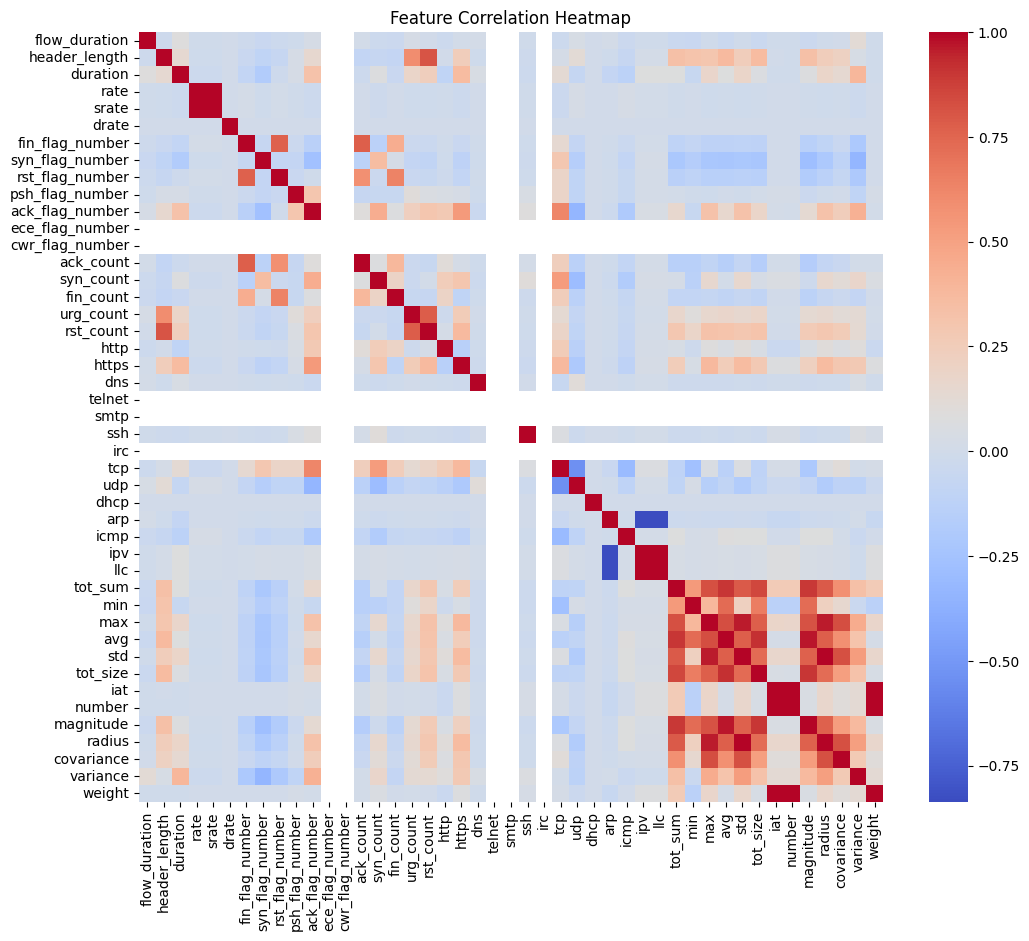

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the non-numeric column 'label' from the dataframe for correlation
numeric_df = balanced_df.drop(columns=['label'])

# Generate a heatmap for feature correlations
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Map labels to broader categories
remap_labels = {
    'DDoS-RSTFINFlood': 'DDoS', 'DDoS-PSHACK_Flood': 'DDoS', 'DDoS-SYN_Flood': 'DDoS',
    'DDoS-UDP_Flood': 'DDoS', 'DDoS-TCP_Flood': 'DDoS', 'DDoS-ICMP_Flood': 'DDoS',
    'DDoS-SynonymousIP_Flood': 'DDoS', 'DDoS-ACK_Fragmentation': 'DDoS',
    'DDoS-UDP_Fragmentation': 'DDoS', 'DDoS-ICMP_Fragmentation': 'DDoS',
    'DDoS-SlowLoris': 'DDoS', 'DDoS-HTTP_Flood': 'DDoS',
    'DoS-UDP_Flood': 'DoS', 'DoS-SYN_Flood': 'DoS', 'DoS-TCP_Flood': 'DoS',
    'DoS-HTTP_Flood': 'DoS', 'Mirai-greeth_flood': 'Mirai', 'Mirai-greip_flood': 'Mirai',
    'Mirai-udpplain': 'Mirai', 'Recon-PingSweep': 'Recon', 'Recon-OSScan': 'Recon',
    'Recon-PortScan': 'Recon', 'VulnerabilityScan': 'Recon', 'Recon-HostDiscovery': 'Recon',
    'DNS_Spoofing': 'Spoofing', 'MITM-ArpSpoofing': 'Spoofing', 'BenignTraffic': 'Benign',
    'BrowserHijacking': 'Web', 'Backdoor_Malware': 'Web', 'XSS': 'Web',
    'Uploading_Attack': 'Web', 'SqlInjection': 'Web', 'CommandInjection': 'Web',
    'DictionaryBruteForce': 'BruteForce'
}

# Apply mapping and encode labels
balanced_df['label'] = balanced_df['label'].map(remap_labels)
label_encoder = LabelEncoder()
balanced_df['label'] = label_encoder.fit_transform(balanced_df['label'])
print("Encoded label distribution:\n", balanced_df['label'].value_counts())

Encoded label distribution:
 label
2    826020
7    413010
5    344175
3    275340
4    206505
6    137670
0     68835
1     68835
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and labels again if needed
X = balanced_df.drop(columns=['label'])
y = balanced_df['label']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 1872312 samples
Testing set size: 468078 samples


In [ ]:
!pip install xgboost

In [ ]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score

# Assuming X and y are defined and preprocessed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Cross-validation configuration
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Dictionary to store runtime for the model
model_runtimes = {}

# Cross-validation and Training Time for Logistic Regression
def cross_validate_logistic_regression(X_train, y_train):
    model = LogisticRegression(max_iter=1000, random_state=42)
    start_time = time.time()
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    end_time = time.time()
    model_runtimes['Logistic Regression'] = end_time - start_time
    print(f"Logistic Regression Cross-Validation Accuracy: Mean={scores.mean():.4f}, Std={scores.std():.4f}")
    print(f"Logistic Regression Training Time (cross-validation): {model_runtimes['Logistic Regression']:.4f} seconds")
    return model

# Prediction Time and Evaluation
def evaluate_logistic_regression(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    start_time = time.time()
    y_pred = model.predict(X_test)
    prediction_time = time.time() - start_time
    print(f"Prediction Time for Logistic Regression: {prediction_time:.4f} seconds")
    print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))

# Run cross-validation and evaluation for Logistic Regression
logistic_model = cross_validate_logistic_regression(X_train, y_train)
evaluate_logistic_regression(logistic_model, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Cross-Validation Accuracy: Mean=0.7747, Std=0.0041
Logistic Regression Training Time (cross-validation): 1044.1053 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Prediction Time for Logistic Regression: 0.0599 seconds
Logistic Regression Accuracy: 0.7797
              precision    recall  f1-score   support

           0       0.58      0.39      0.47     13767
           1       0.77      0.31      0.44     13767
           2       0.82      0.92      0.87    165204
           3       0.93      0.69      0.79     55068
           4       1.00      0.99      0.99     41301
           5       0.63      0.61      0.62     68835
           6       0.79      0.47      0.59     27534
           7       0.67      0.83      0.74     82602

    accuracy                           0.78    468078
   macro avg       0.77      0.65      0.69    468078
weighted avg       0.78      0.78      0.77    468078



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
import time

# Define cross-validation splits
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Function for cross-validation and training
def cross_validate_svm(X_train, y_train):
    print("Performing Cross-Validation for SVM...")
    model = SVC(kernel='linear', probability=True, max_iter=1000, random_state=42)  # Use a linear kernel and limit iterations
    start_time = time.time()
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    end_time = time.time()
    print(f"SVM Cross-Validation Scores: {scores}")
    print(f"SVM Cross-Validation Accuracy: Mean={scores.mean():.4f}, Std={scores.std():.4f}")
    print(f"SVM Cross-Validation Time: {end_time - start_time:.2f} seconds")
    return model

# Function to evaluate SVM
def evaluate_svm(model, X_train, y_train, X_test, y_test):
    print("Training and Testing SVM Model...")
    model.fit(X_train, y_train)
    start_time = time.time()
    y_pred = model.predict(X_test)
    prediction_time = time.time() - start_time
    print(f"Prediction Time for SVM: {prediction_time:.4f} seconds")
    print(f"SVM Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nSVM Classification Report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    print("\nSVM Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Run cross-validation and evaluation for SVM
svm_model = cross_validate_svm(X_train, y_train)
evaluate_svm(svm_model, X_train, y_train, X_test, y_test)

Performing Cross-Validation for SVM...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
import numpy as np

# Cross-validation setup
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Initialize the model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Perform cross-validation
scores = cross_val_score(logistic_model, X_train, y_train, cv=cv, scoring='accuracy')

# Display results in the required format
print("Performing Cross-Validation for Logistic Regression...")
print("Logistic Regression Cross-Validation Scores:", scores)
print("Logistic Regression Average Cross-Validation Accuracy:", np.mean(scores))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Performing Cross-Validation for Logistic Regression...
Logistic Regression Cross-Validation Scores: [0.7732269  0.76809474 0.76943266]
Logistic Regression Average Cross-Validation Accuracy: 0.7702514324535654


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Cross-validation and Training Time for K-Nearest Neighbors
def cross_validate_knn(X_train, y_train):
    model = KNeighborsClassifier(n_neighbors=5)  # Adjust n_neighbors if necessary
    start_time = time.time()
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    end_time = time.time()
    model_runtimes['K-Nearest Neighbors'] = end_time - start_time
    print(f"K-Nearest Neighbors Cross-Validation Accuracy: Mean={scores.mean():.4f}, Std={scores.std():.4f}")
    print(f"K-Nearest Neighbors Training Time (cross-validation): {model_runtimes['K-Nearest Neighbors']:.4f} seconds")
    return model

# Prediction Time and Evaluation for K-Nearest Neighbors
def evaluate_knn(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    start_time = time.time()
    y_pred = model.predict(X_test)
    prediction_time = time.time() - start_time
    print(f"Prediction Time for K-Nearest Neighbors: {prediction_time:.4f} seconds")
    print(f"K-Nearest Neighbors Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))

# Run cross-validation and evaluation for K-Nearest Neighbors
knn_model = cross_validate_knn(X_train, y_train)
evaluate_knn(knn_model, X_train, y_train, X_test, y_test)

K-Nearest Neighbors Cross-Validation Accuracy: Mean=0.9847, Std=0.0001
K-Nearest Neighbors Training Time (cross-validation): 3258.1771 seconds
Prediction Time for K-Nearest Neighbors: 1214.8700 seconds
K-Nearest Neighbors Accuracy: 0.9883
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     13767
           1       1.00      1.00      1.00     13767
           2       0.99      0.99      0.99    165204
           3       0.96      0.97      0.96     55068
           4       1.00      1.00      1.00     41301
           5       0.99      1.00      0.99     68835
           6       0.99      0.98      0.99     27534
           7       1.00      1.00      1.00     82602

    accuracy                           0.99    468078
   macro avg       0.99      0.99      0.99    468078
weighted avg       0.99      0.99      0.99    468078



In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
import time

# Assuming you already have your dataset loaded as 'df' with target column as 'y' and features as 'X'
# Replace 'Class0', 'Class1', ... with your actual class names
class_names = ['Class0', 'Class1', 'Class2', 'Class3', 'Class4', 'Class5', 'Class6', 'Class7']

# Data Preparation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize RandomForest
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)

# Cross-Validation (3-fold)
print("Performing 3-Fold Cross-Validation...")
start_cv = time.time()
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)
end_cv = time.time()

# Display Cross-Validation Results
print(f"Cross-Validation Scores for each fold: {cv_scores}")
print(f"Cross-Validation Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Cross-Validation Standard Deviation: {np.std(cv_scores):.4f}")
print(f"Time for Cross-Validation: {end_cv - start_cv:.2f} seconds\n")

# Training the Random Forest Model
print("Training Random Forest Model...")
start_train = time.time()
rf_model.fit(X_train, y_train)
end_train = time.time()
print(f"Training Time: {end_train - start_train:.2f} seconds")

# Testing and Prediction
print("Testing Random Forest Model...")
start_test = time.time()
y_pred = rf_model.predict(X_test)
end_test = time.time()
prediction_time = end_test - start_test
print(f"Prediction Time: {prediction_time:.4f} seconds")

# Evaluation Metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Summary
print("\nSummary:")
print(f"Cross-Validation Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Cross-Validation Std Dev: {np.std(cv_scores):.4f}")
print(f"Training Time: {end_train - start_train:.2f} seconds")
print(f"Prediction Time: {prediction_time:.4f} seconds")

Performing 3-Fold Cross-Validation...
Cross-Validation Scores for each fold: [0.92902465 0.92899581 0.93172612]
Cross-Validation Mean Accuracy: 0.9299
Cross-Validation Standard Deviation: 0.0013
Time for Cross-Validation: 99.16 seconds

Training Random Forest Model...
Training Time: 51.11 seconds
Testing Random Forest Model...
Prediction Time: 0.3683 seconds

Classification Report:
              precision    recall  f1-score   support

      Class0       0.88      0.62      0.73     13767
      Class1       1.00      0.48      0.65     13767
      Class2       1.00      1.00      1.00    165204
      Class3       1.00      1.00      1.00     55068
      Class4       1.00      0.99      1.00     41301
      Class5       0.87      0.87      0.87     68835
      Class6       0.95      0.68      0.79     27534
      Class7       0.81      1.00      0.89     82602

    accuracy                           0.93    468078
   macro avg       0.94      0.83      0.87    468078
weighted avg       

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
import time

# Define cross-validation splits
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Function for cross-validation and training
def cross_validate_naive_bayes(X_train, y_train):
    print("Performing Cross-Validation for Naive Bayes...")
    model = GaussianNB()
    start_time = time.time()
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    end_time = time.time()
    print(f"Naive Bayes Cross-Validation Scores: {scores}")
    print(f"Naive Bayes Cross-Validation Accuracy: Mean={scores.mean():.4f}, Std={scores.std():.4f}")
    print(f"Naive Bayes Cross-Validation Time: {end_time - start_time:.2f} seconds")
    return model

# Function to evaluate Naive Bayes
def evaluate_naive_bayes(model, X_train, y_train, X_test, y_test):
    print("Training and Testing Naive Bayes Model...")
    model.fit(X_train, y_train)
    start_time = time.time()
    y_pred = model.predict(X_test)
    prediction_time = time.time() - start_time
    print(f"Prediction Time for Naive Bayes: {prediction_time:.4f} seconds")
    print(f"Naive Bayes Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nNaive Bayes Classification Report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    print("\nNaive Bayes Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Run cross-validation and evaluation for Naive Bayes
nb_model = cross_validate_naive_bayes(X_train, y_train)
evaluate_naive_bayes(nb_model, X_train, y_train, X_test, y_test)

Performing Cross-Validation for Naive Bayes...
Naive Bayes Cross-Validation Scores: [0.4919052  0.49650379 0.49626665]
Naive Bayes Cross-Validation Accuracy: Mean=0.4949, Std=0.0021
Naive Bayes Cross-Validation Time: 8.28 seconds
Training and Testing Naive Bayes Model...
Prediction Time for Naive Bayes: 0.4651 seconds
Naive Bayes Accuracy: 0.4929

Naive Bayes Classification Report:
              precision    recall  f1-score   support

      Benign       0.22      0.28      0.25     13767
  BruteForce       0.19      0.49      0.28     13767
        DDoS       1.00      0.26      0.41    165204
         DoS       0.42      0.92      0.58     55068
       Mirai       1.00      0.98      0.99     41301
       Recon       0.98      0.20      0.34     68835
    Spoofing       0.78      0.10      0.18     27534
         Web       0.36      0.85      0.50     82602

    accuracy                           0.49    468078
   macro avg       0.62      0.51      0.44    468078
weighted avg       

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Function for cross-validation and training
def cross_validate_decision_tree(X_train, y_train):
    print("Performing Cross-Validation for Decision Tree...")
    model = DecisionTreeClassifier(max_depth=5, random_state=42)  # Adjust max_depth if necessary
    start_time = time.time()
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    end_time = time.time()
    print(f"Decision Tree Cross-Validation Scores: {scores}")
    print(f"Decision Tree Cross-Validation Accuracy: Mean={scores.mean():.4f}, Std={scores.std():.4f}")
    print(f"Decision Tree Cross-Validation Time: {end_time - start_time:.2f} seconds")
    return model

# Function to evaluate Decision Tree
def evaluate_decision_tree(model, X_train, y_train, X_test, y_test):
    print("Training and Testing Decision Tree Model...")
    model.fit(X_train, y_train)
    start_time = time.time()
    y_pred = model.predict(X_test)
    prediction_time = time.time() - start_time
    print(f"Prediction Time for Decision Tree: {prediction_time:.4f} seconds")
    print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nDecision Tree Classification Report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    print("\nDecision Tree Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Run cross-validation and evaluation for Decision Tree
dt_model = cross_validate_decision_tree(X_train, y_train)
evaluate_decision_tree(dt_model, X_train, y_train, X_test, y_test)

Performing Cross-Validation for Decision Tree...
Decision Tree Cross-Validation Scores: [0.81934902 0.81924647 0.81939068]
Decision Tree Cross-Validation Accuracy: Mean=0.8193, Std=0.0001
Decision Tree Cross-Validation Time: 63.77 seconds
Training and Testing Decision Tree Model...
Prediction Time for Decision Tree: 0.0854 seconds
Decision Tree Accuracy: 0.8191

Decision Tree Classification Report:
              precision    recall  f1-score   support

      Benign       0.43      0.27      0.33     13767
  BruteForce       0.39      0.52      0.45     13767
        DDoS       1.00      0.87      0.93    165204
         DoS       1.00      1.00      1.00     55068
       Mirai       1.00      0.98      0.99     41301
       Recon       0.65      0.67      0.66     68835
    Spoofing       0.54      0.73      0.63     27534
         Web       0.71      0.81      0.75     82602

    accuracy                           0.82    468078
   macro avg       0.72      0.73      0.72    468078
we

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Training Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Runtime: 57.6483 seconds
Logistic Regression Accuracy: 0.6999
              precision    recall  f1-score   support

      Benign       0.57      0.37      0.45     13767
  BruteForce       0.84      0.29      0.43     13767
        DDoS       0.74      0.89      0.81    165204
         DoS       0.67      0.31      0.43     55068
       Mirai       0.99      0.99      0.99     41301
       Recon       0.59      0.48      0.53     68835
    Spoofing       0.75      0.45      0.56     27534
         Web       0.58      0.81      0.68     82602

    accuracy                           0.70    468078
   macro avg       0.72      0.58      0.61    468078
weighted avg       0.70      0.70      0.68    468078



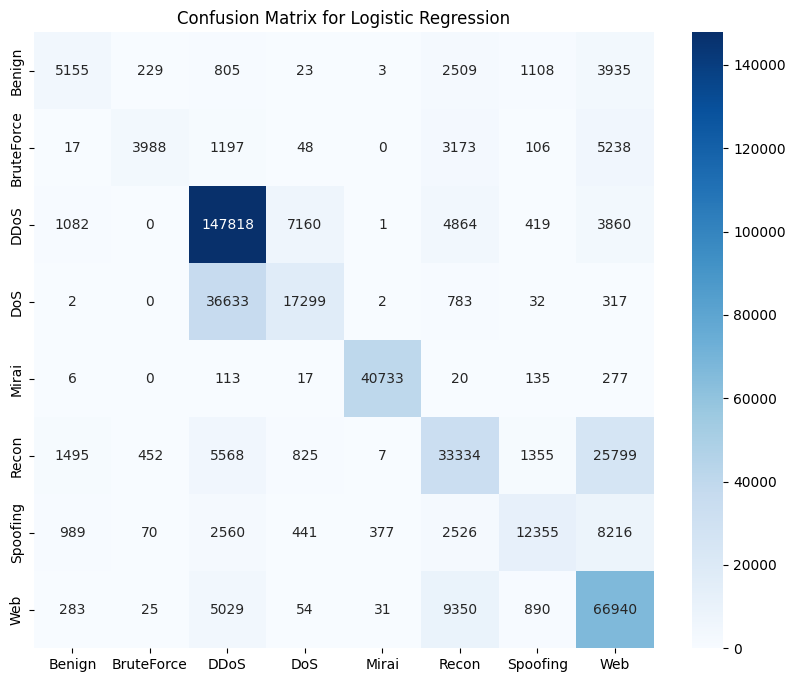


Performing Cross-Validation for Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Cross-Validation Scores: [0.69814134 0.70333021 0.69639291]
Logistic Regression Average Cross-Validation Accuracy: 0.6992881528292294

Training K-Nearest Neighbors...
K-Nearest Neighbors Runtime: 156.2393 seconds
K-Nearest Neighbors Accuracy: 0.9883
              precision    recall  f1-score   support

      Benign       0.99      0.96      0.97     13767
  BruteForce       1.00      1.00      1.00     13767
        DDoS       0.99      0.99      0.99    165204
         DoS       0.96      0.97      0.96     55068
       Mirai       1.00      1.00      1.00     41301
       Recon       0.99      1.00      0.99     68835
    Spoofing       0.99      0.98      0.99     27534
         Web       1.00      1.00      1.00     82602

    accuracy                           0.99    468078
   macro avg       0.99      0.99      0.99    468078
weighted avg       0.99      0.99      0.99    468078



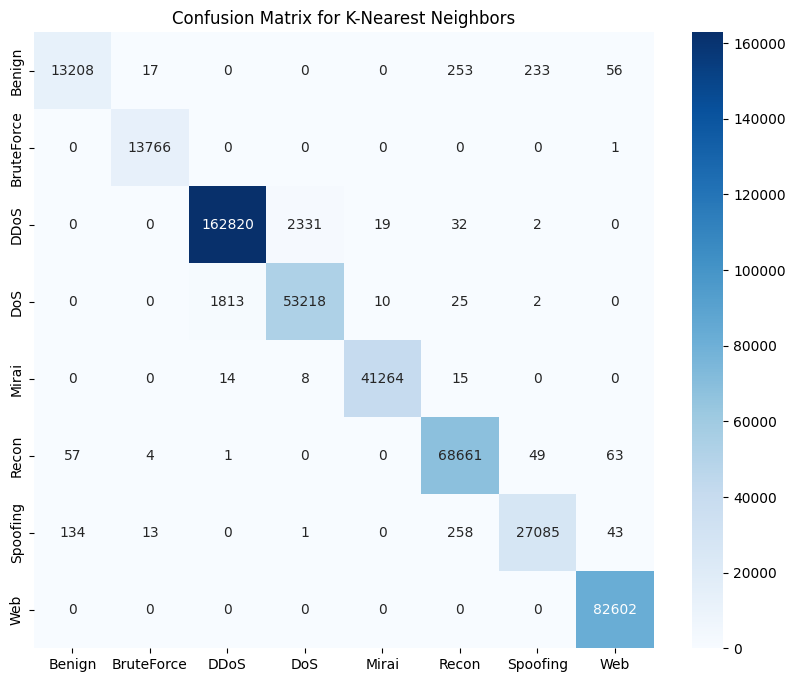


Performing Cross-Validation for K-Nearest Neighbors...
K-Nearest Neighbors Cross-Validation Scores: [0.98684322 0.98685732 0.9866894 ]
K-Nearest Neighbors Average Cross-Validation Accuracy: 0.9867966450036105

Training Random Forest...
Random Forest Runtime: 13.4132 seconds
Random Forest Accuracy: 0.9317
              precision    recall  f1-score   support

      Benign       0.86      0.60      0.71     13767
  BruteForce       0.99      0.48      0.65     13767
        DDoS       1.00      1.00      1.00    165204
         DoS       1.00      1.00      1.00     55068
       Mirai       1.00      0.99      1.00     41301
       Recon       0.86      0.87      0.86     68835
    Spoofing       0.95      0.67      0.79     27534
         Web       0.81      0.99      0.89     82602

    accuracy                           0.93    468078
   macro avg       0.93      0.83      0.86    468078
weighted avg       0.94      0.93      0.93    468078



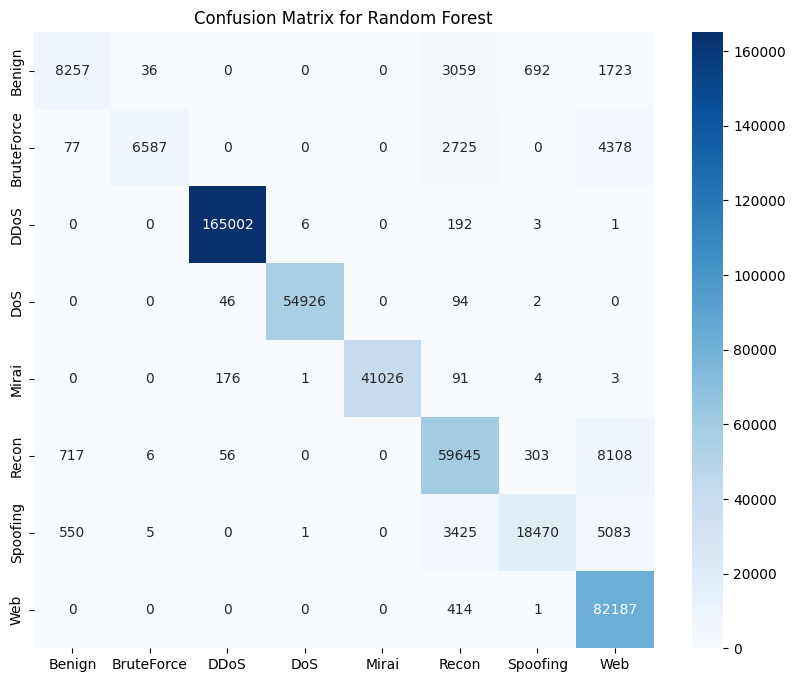


Performing Cross-Validation for Random Forest...
Random Forest Cross-Validation Scores: [0.93089357 0.92854012 0.93017702]
Random Forest Average Cross-Validation Accuracy: 0.9298702353026632

Training Naive Bayes...
Naive Bayes Runtime: 3.6053 seconds
Naive Bayes Accuracy: 0.4949
              precision    recall  f1-score   support

      Benign       0.23      0.28      0.25     13767
  BruteForce       0.19      0.49      0.28     13767
        DDoS       0.99      0.26      0.41    165204
         DoS       0.43      0.92      0.58     55068
       Mirai       1.00      0.98      0.99     41301
       Recon       0.98      0.22      0.35     68835
    Spoofing       0.77      0.09      0.17     27534
         Web       0.36      0.85      0.50     82602

    accuracy                           0.49    468078
   macro avg       0.62      0.51      0.44    468078
weighted avg       0.75      0.49      0.47    468078



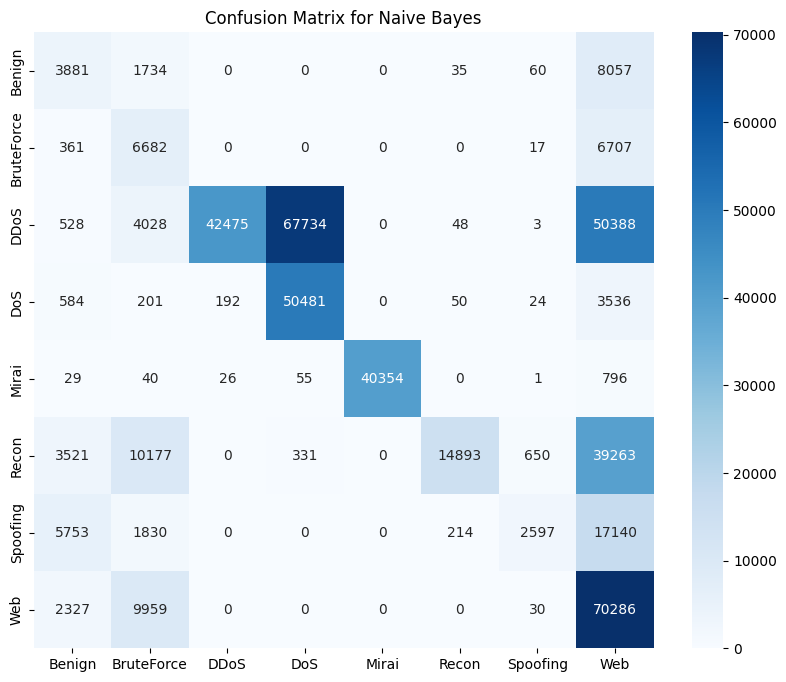


Performing Cross-Validation for Naive Bayes...
Naive Bayes Cross-Validation Scores: [0.49245382 0.49761578 0.4939587 ]
Naive Bayes Average Cross-Validation Accuracy: 0.49467610099171505

Training Decision Tree...
Decision Tree Runtime: 51.8784 seconds
Decision Tree Accuracy: 0.9487
              precision    recall  f1-score   support

      Benign       0.80      0.83      0.81     13767
  BruteForce       0.92      0.75      0.83     13767
        DDoS       1.00      0.99      1.00    165204
         DoS       1.00      1.00      1.00     55068
       Mirai       1.00      1.00      1.00     41301
       Recon       0.90      0.87      0.88     68835
    Spoofing       0.97      0.79      0.87     27534
         Web       0.86      0.98      0.92     82602

    accuracy                           0.95    468078
   macro avg       0.93      0.90      0.91    468078
weighted avg       0.95      0.95      0.95    468078



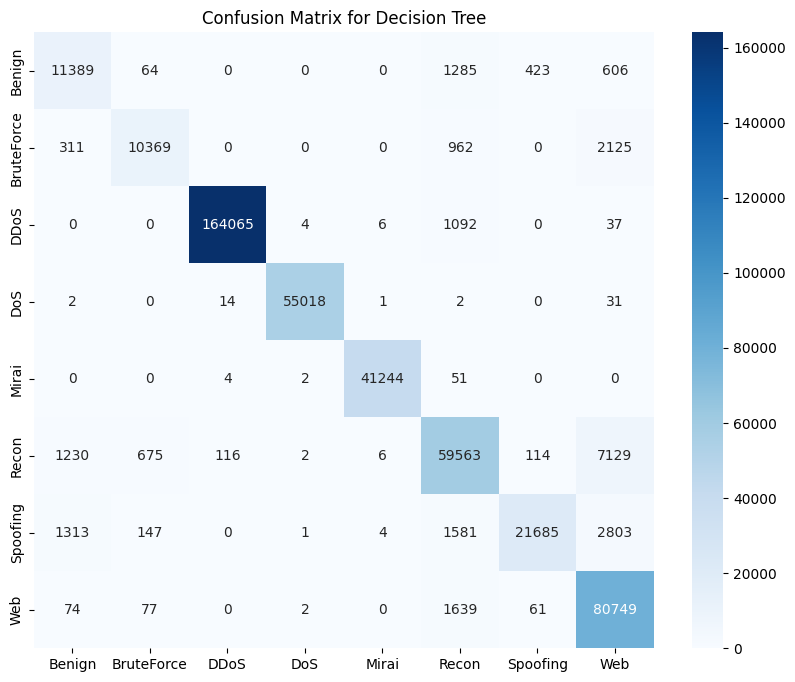


Performing Cross-Validation for Decision Tree...
Decision Tree Cross-Validation Scores: [0.94831374 0.94792406 0.94851884]
Decision Tree Average Cross-Validation Accuracy: 0.9482522143745274

--- Model Runtimes ---
Logistic Regression: 57.6483 seconds
K-Nearest Neighbors: 156.2393 seconds
Random Forest: 13.4132 seconds
Naive Bayes: 3.6053 seconds
Decision Tree: 51.8784 seconds


In [ ]:
import time
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionary to store runtime for each model
model_runtimes = {}

# Cross-validation configuration
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Optional: Reduce dataset for cross-validation if needed (uncomment if necessary)
# X_sample = X.sample(frac=0.1, random_state=42)
# y_sample = y.loc[X_sample.index]

# Function to perform cross-validation
def cross_validate_model(model, X, y, model_name):
    print(f"\nPerforming Cross-Validation for {model_name}...")
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f"{model_name} Cross-Validation Scores:", scores)
    print(f"{model_name} Average Cross-Validation Accuracy:", np.mean(scores))

# Logistic Regression
print("\nTraining Logistic Regression...")
start_time = time.time()
logistic_model = LogisticRegression(max_iter=100, random_state=42)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
end_time = time.time()
model_runtimes["Logistic Regression"] = end_time - start_time
print(f"Logistic Regression Runtime: {model_runtimes['Logistic Regression']:.4f} seconds")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

# Cross-validation for Logistic Regression
cross_validate_model(logistic_model, X, y, "Logistic Regression")

# K-Nearest Neighbors (optional, remove if slow)
print("\nTraining K-Nearest Neighbors...")
start_time = time.time()
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
end_time = time.time()
model_runtimes["K-Nearest Neighbors"] = end_time - start_time
print(f"K-Nearest Neighbors Runtime: {model_runtimes['K-Nearest Neighbors']:.4f} seconds")
print(f"K-Nearest Neighbors Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix for K-Nearest Neighbors")
plt.show()

# Cross-validation for K-Nearest Neighbors
cross_validate_model(knn_model, X, y, "K-Nearest Neighbors")

# Random Forest with reduced n_estimators and parallel processing
print("\nTraining Random Forest...")
start_time = time.time()
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
end_time = time.time()
model_runtimes["Random Forest"] = end_time - start_time
print(f"Random Forest Runtime: {model_runtimes['Random Forest']:.4f} seconds")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix for Random Forest")
plt.show()

# Cross-validation for Random Forest (use X_sample, y_sample if dataset is very large)
cross_validate_model(rf_model, X, y, "Random Forest")

# Naive Bayes
print("\nTraining Naive Bayes...")
start_time = time.time()
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
end_time = time.time()
model_runtimes["Naive Bayes"] = end_time - start_time
print(f"Naive Bayes Runtime: {model_runtimes['Naive Bayes']:.4f} seconds")
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix for Naive Bayes")
plt.show()

# Cross-validation for Naive Bayes
cross_validate_model(nb_model, X, y, "Naive Bayes")

# Decision Tree with limited depth to avoid overfitting
print("\nTraining Decision Tree...")
start_time = time.time()
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
end_time = time.time()
model_runtimes["Decision Tree"] = end_time - start_time
print(f"Decision Tree Runtime: {model_runtimes['Decision Tree']:.4f} seconds")
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix for Decision Tree")
plt.show()

# Cross-validation for Decision Tree (use X_sample, y_sample if dataset is very large)
cross_validate_model(dt_model, X, y, "Decision Tree")

# Display runtime for each model
print("\n--- Model Runtimes ---")
for model_name, runtime in model_runtimes.items():
    print(f"{model_name}: {runtime:.4f} seconds")

Training the Tuned Hybrid Model...
Training Time: 331.55 seconds
Predicting with the Tuned Hybrid Model...
Prediction Time: 1.45 seconds
Tuned Hybrid Model Accuracy: 0.9807
Classification Report for Tuned Hybrid Model:
               precision    recall  f1-score   support

      Benign       0.95      0.83      0.89     22945
  BruteForce       0.98      0.95      0.97     22945
        DDoS       1.00      1.00      1.00    275340
         DoS       1.00      1.00      1.00     91780
       Mirai       1.00      1.00      1.00     68835
       Recon       0.93      0.98      0.95    114725
    Spoofing       0.97      0.85      0.91     45890
         Web       0.97      1.00      0.98    137670

    accuracy                           0.98    780130
   macro avg       0.98      0.95      0.96    780130
weighted avg       0.98      0.98      0.98    780130



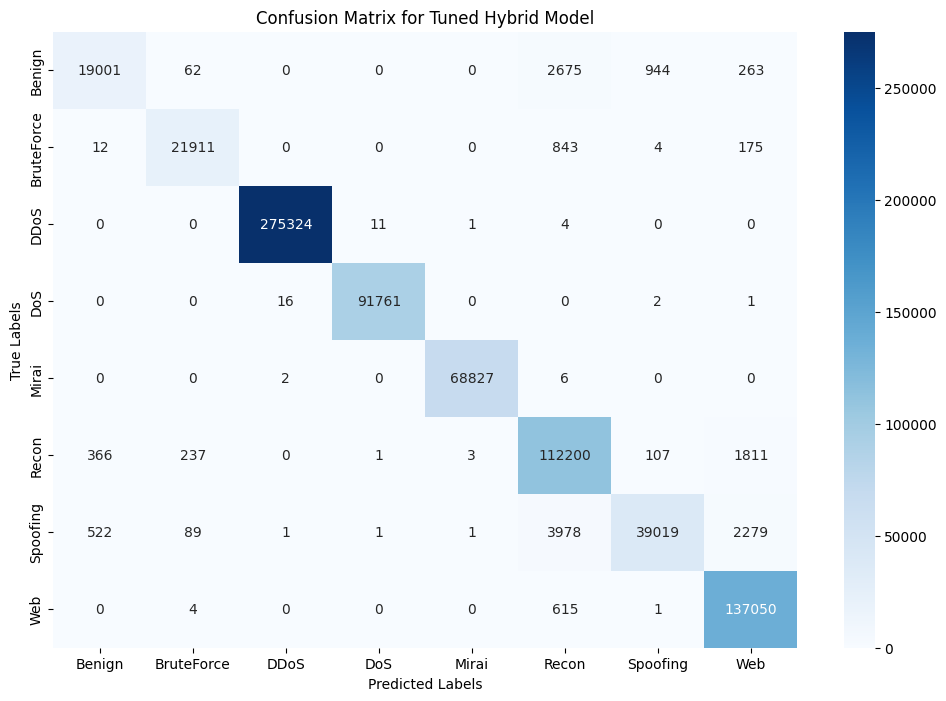

In [ ]:
import time
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define base models
base_learners = [
    ('dt', DecisionTreeClassifier(max_depth=10, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=50, max_depth=6, eval_metric='mlogloss', random_state=42))
]

# Meta-learner
meta_learner = LogisticRegression(random_state=42)

# Stacking model
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)

# Fit the stacking model
print("Training the Tuned Hybrid Model...")
start_train_time = time.time()  # Start timer for training
stacking_model.fit(X_train, y_train)
end_train_time = time.time()  # End timer for training
training_time = end_train_time - start_train_time
print(f"Training Time: {training_time:.2f} seconds")

# Predict and measure prediction time
print("Predicting with the Tuned Hybrid Model...")
start_pred_time = time.time()  # Start timer for prediction
y_pred = stacking_model.predict(X_test)
end_pred_time = time.time()  # End timer for prediction
prediction_time = end_pred_time - start_pred_time
print(f"Prediction Time: {prediction_time:.2f} seconds")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Tuned Hybrid Model Accuracy: {accuracy:.4f}")

# Classification report
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("Classification Report for Tuned Hybrid Model:\n", classification_rep)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Tuned Hybrid Model")
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
import time

# Define base learners
base_learners = [
    ('dt', DecisionTreeClassifier(max_depth=10, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=50, max_depth=6, eval_metric='mlogloss', use_label_encoder=False, random_state=42))
]

# Define the meta-learner
meta_learner = LogisticRegression(max_iter=100, random_state=42)

# Define the stacking model
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=3)

# Prepare cross-validation
n_folds = 3
kf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Prepare lists to store metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []
fold_runtimes = []

fold = 1

for train_index, test_index in kf.split(X, y):
    print(f"\n--- Fold {fold} ---")

    # Split the data for the current fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Track the start time
    start_time = time.time()

    # Train the stacking model
    stacking_model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = stacking_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Track end time and calculate runtime
    end_time = time.time()
    runtime = end_time - start_time
    fold_runtimes.append(runtime)

    # Store metrics
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    print(f"Fold {fold} Accuracy: {accuracy:.4f}")
    print(f"Fold {fold} Precision: {precision:.4f}")
    print(f"Fold {fold} Recall: {recall:.4f}")
    print(f"Fold {fold} F1 Score: {f1:.4f}")
    print(f"Fold {fold} Runtime: {runtime:.4f} seconds\n")

    fold += 1

# Calculate average metrics
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)
avg_runtime = np.mean(fold_runtimes)

# Display cross-validation results
print("\n=== Cross-Validation Results for Tuned Hybrid Model ===")
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")
print(f"Average Runtime per Fold: {avg_runtime:.4f} seconds")


--- Fold 1 ---


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:21:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:22:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:23:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:23:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 Accuracy: 0.9753
Fold 1 Precision: 0.9757
Fold 1 Recall: 0.9753
Fold 1 F1 Score: 0.9748
Fold 1 Runtime: 217.8647 seconds


--- Fold 2 ---


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:24:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:26:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:26:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:26:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. 

Fold 2 Accuracy: 0.9730
Fold 2 Precision: 0.9738
Fold 2 Recall: 0.9730
Fold 2 F1 Score: 0.9725
Fold 2 Runtime: 214.5564 seconds


--- Fold 3 ---


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:28:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:29:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:30:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:30:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 3 Accuracy: 0.9728
Fold 3 Precision: 0.9737
Fold 3 Recall: 0.9728
Fold 3 F1 Score: 0.9722
Fold 3 Runtime: 213.0372 seconds


=== Cross-Validation Results for Tuned Hybrid Model ===
Average Accuracy: 0.9737
Average Precision: 0.9744
Average Recall: 0.9737
Average F1 Score: 0.9732
Average Runtime per Fold: 215.1528 seconds


Training set size: 400000 samples
Testing set size: 100000 samples


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:55:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:56:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:56:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:56:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Prediction Time: 0.4797 seconds
Stacking Ensemble Accuracy: 0.9851
Classification Report for Stacking Ensemble:
               precision    recall  f1-score   support

      Benign       0.92      0.86      0.89      2944
  BruteForce       0.97      0.98      0.97      2936
        DDoS       1.00      1.00      1.00     35288
         DoS       1.00      1.00      1.00     11791
       Mirai       1.00      1.00      1.00      8857
       Recon       0.95      0.97      0.96     14683
    Spoofing       0.95      0.91      0.93      5874
         Web       0.99      1.00      0.99     17627

    accuracy                           0.99    100000
   macro avg       0.97      0.96      0.97    100000
weighted avg       0.98      0.99      0.98    100000



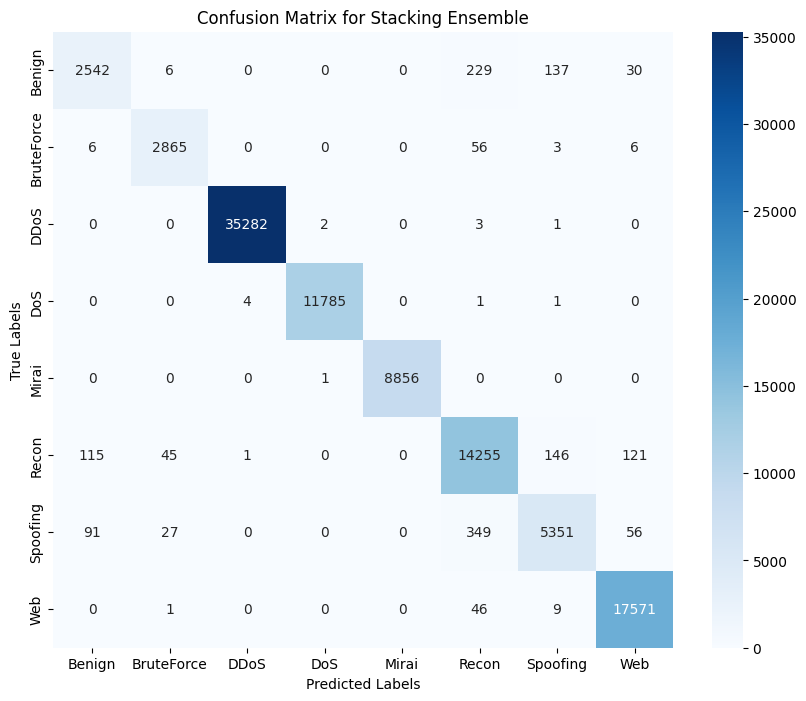

In [ ]:
# Step 1: Downsample the dataset
# Adjust the sample size to reduce computation time
sampled_df = balanced_df.sample(n=500000, random_state=42)

# Separate features and labels again
X = sampled_df.drop(columns=['label'])
y = sampled_df['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Step 2: Reduce estimators and model complexity
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define base models with reduced complexity
base_learners = [
    ('xgb', xgb.XGBClassifier(n_estimators=50, max_depth=6, eval_metric='mlogloss', use_label_encoder=False, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=50, max_depth=6, random_state=42)),
    ('dt', DecisionTreeClassifier(max_depth=6, random_state=42))
]

# Meta-learner
meta_learner = LogisticRegression(max_iter=100, random_state=42)

# Stacking ensemble
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=3)

# Step 3: Train the stacking model
stacking_model.fit(X_train, y_train)

# Step 4: Evaluate the model
import time

# Measure prediction time
start_time = time.time()
y_pred = stacking_model.predict(X_test)
end_time = time.time()

prediction_time = end_time - start_time
print(f"Prediction Time: {prediction_time:.4f} seconds")

accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Ensemble Accuracy: {accuracy:.4f}")

classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("Classification Report for Stacking Ensemble:\n", classification_rep)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Stacking Ensemble")
plt.show()

In [ ]:
# Import necessary libraries
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import xgboost as xgb
import numpy as np

# Simplify base models to reduce training time
base_learners = [
    ('xgb', xgb.XGBClassifier(n_estimators=10, max_depth=3, eval_metric='mlogloss', random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=10, max_depth=3, random_state=42)),
    ('dt', DecisionTreeClassifier(max_depth=3, random_state=42))
]

# Define the meta-learner
meta_learner = LogisticRegression(max_iter=100, random_state=42)

# Define the stacking model
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=3, n_jobs=-1)

# Set up StratifiedKFold for cross-validation
num_folds = 3  # Fewer folds for faster results
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Prepare lists to store metrics across folds
accuracies = []
precisions = []
recalls = []
f1_scores = []

fold = 1

# Perform cross-validation
for train_index, test_index in kf.split(X, y):
    print(f"\n--- Fold {fold} ---")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the stacking model on the current fold
    stacking_model.fit(X_train, y_train)

    # Predictions and evaluation on the test set for the current fold
    y_pred = stacking_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    # Append metrics to lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Print classification report for this fold
    print(f"Accuracy for Fold {fold}: {accuracy:.4f}")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    fold += 1

# Calculate average metrics across folds
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)

print("\n--- Cross-Validation Results ---")
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")


--- Fold 1 ---
Accuracy for Fold 1: 0.9228
              precision    recall  f1-score   support

      Benign       0.75      0.70      0.73      4907
  BruteForce       0.93      0.62      0.74      4893
        DDoS       1.00      0.99      1.00     58814
         DoS       1.00      1.00      1.00     19652
       Mirai       1.00      0.99      1.00     14762
       Recon       0.81      0.82      0.81     24471
    Spoofing       0.88      0.77      0.82      9789
         Web       0.83      0.92      0.87     29379

    accuracy                           0.92    166667
   macro avg       0.90      0.85      0.87    166667
weighted avg       0.92      0.92      0.92    166667


--- Fold 2 ---


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for Fold 2: 0.9133
              precision    recall  f1-score   support

      Benign       0.76      0.70      0.73      4908
  BruteForce       0.87      0.64      0.74      4892
        DDoS       1.00      0.99      0.99     58813
         DoS       1.00      1.00      1.00     19653
       Mirai       1.00      0.99      1.00     14762
       Recon       0.76      0.81      0.78     24471
    Spoofing       0.87      0.77      0.82      9790
         Web       0.83      0.87      0.85     29378

    accuracy                           0.91    166667
   macro avg       0.89      0.85      0.86    166667
weighted avg       0.91      0.91      0.91    166667


--- Fold 3 ---


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for Fold 3: 0.9245
              precision    recall  f1-score   support

      Benign       0.71      0.74      0.72      4907
  BruteForce       0.90      0.63      0.74      4893
        DDoS       1.00      1.00      1.00     58813
         DoS       1.00      1.00      1.00     19652
       Mirai       1.00      0.99      1.00     14762
       Recon       0.82      0.82      0.82     24471
    Spoofing       0.89      0.78      0.83      9789
         Web       0.84      0.91      0.87     29379

    accuracy                           0.92    166666
   macro avg       0.89      0.86      0.87    166666
weighted avg       0.93      0.92      0.92    166666


--- Cross-Validation Results ---
Average Accuracy: 0.9202
Average Precision: 0.9216
Average Recall: 0.9202
Average F1 Score: 0.9197


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:32:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:33:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:33:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:33:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:33:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Prediction Time: 0.1931 seconds
Hybrid Stacking Model Accuracy: 0.9850
Classification Report for Hybrid Model:
               precision    recall  f1-score   support

      Benign       0.91      0.87      0.89      2944
  BruteForce       0.97      0.97      0.97      2936
        DDoS       1.00      1.00      1.00     35288
         DoS       1.00      1.00      1.00     11791
       Mirai       1.00      1.00      1.00      8857
       Recon       0.96      0.97      0.96     14683
    Spoofing       0.95      0.91      0.93      5874
         Web       0.99      1.00      0.99     17627

    accuracy                           0.99    100000
   macro avg       0.97      0.96      0.97    100000
weighted avg       0.98      0.99      0.98    100000



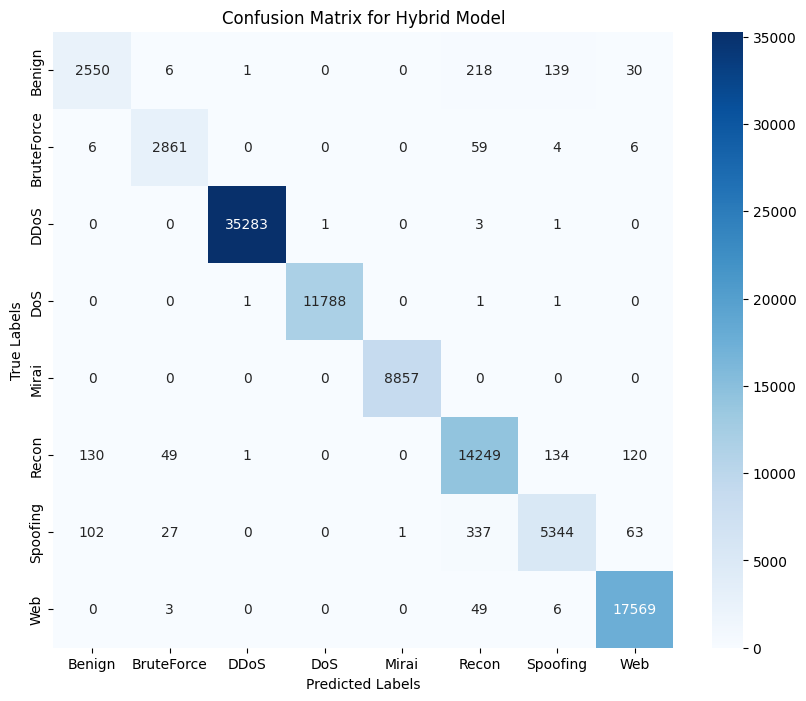

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Define base models
base_learners = [
    ('dt', DecisionTreeClassifier(max_depth=10, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_estimators=50, max_depth=6, random_state=42))
]

# Meta-learner
meta_learner = LogisticRegression(random_state=42)

# Stacking Model
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)
stacking_model.fit(X_train, y_train)

# Evaluate the hybrid model
# Measure prediction time
start_time = time.time()
y_pred = stacking_model.predict(X_test)
end_time = time.time()

prediction_time = end_time - start_time
print(f"Prediction Time: {prediction_time:.4f} seconds")

# Accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Hybrid Stacking Model Accuracy: {accuracy:.4f}")
print("Classification Report for Hybrid Model:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Hybrid Model")
plt.show()

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:03:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:06:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:07:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:07:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:07:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Hybrid Stacking Model Accuracy: 0.9856
Classification Report for Hybrid Model:
               precision    recall  f1-score   support

      Benign       0.92      0.87      0.89     13767
  BruteForce       0.97      0.98      0.97     13767
        DDoS       1.00      1.00      1.00    165204
         DoS       1.00      1.00      1.00     55068
       Mirai       1.00      1.00      1.00     41301
       Recon       0.96      0.97      0.97     68835
    Spoofing       0.95      0.92      0.93     27534
         Web       0.99      0.99      0.99     82602

    accuracy                           0.99    468078
   macro avg       0.97      0.97      0.97    468078
weighted avg       0.99      0.99      0.99    468078



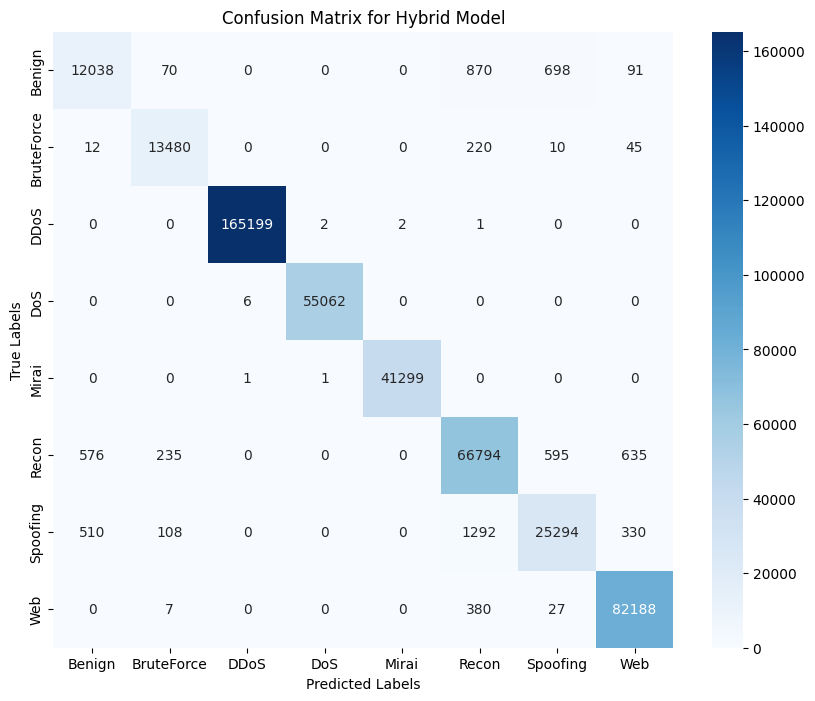

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define base models
base_learners = [
    ('dt', DecisionTreeClassifier(max_depth=10, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_estimators=50, max_depth=6, random_state=42))
]

# Meta-learner
meta_learner = LogisticRegression(random_state=42)

# Stacking Model
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)
stacking_model.fit(X_train, y_train)

# Evaluate the hybrid model
y_pred = stacking_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Hybrid Stacking Model Accuracy: {accuracy:.4f}")
print("Classification Report for Hybrid Model:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Hybrid Model")
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import time

# Set up Stratified K-Fold cross-validation
num_folds = 3
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store results across folds
accuracies = []
precisions = []
recalls = []
f1_scores = []
fold_runtimes = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X, y), start=1):
    print(f"\n--- Fold {fold} ---")

    # Split data for the current fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Track the start time
    start_time = time.time()

    # Train the stacking model
    stacking_model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = stacking_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Track end time and calculate runtime
    end_time = time.time()
    runtime = end_time - start_time
    fold_runtimes.append(runtime)

    # Store metrics
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Display fold results
    print(f"Fold {fold} Accuracy: {accuracy:.4f}")
    print(f"Fold {fold} Precision: {precision:.4f}")
    print(f"Fold {fold} Recall: {recall:.4f}")
    print(f"Fold {fold} F1 Score: {f1:.4f}")
    print(f"Fold {fold} Runtime: {runtime:.4f} seconds\n")

# Average metrics across folds
print("\n--- Cross-Validation Results for Hybrid Model ---")
print(f"Average Accuracy: {np.mean(accuracies):.4f}")
print(f"Average Precision: {np.mean(precisions):.4f}")
print(f"Average Recall: {np.mean(recalls):.4f}")
print(f"Average F1 Score: {np.mean(f1_scores):.4f}")
print(f"Average Runtime per Fold: {np.mean(fold_runtimes):.4f} seconds")


--- Fold 1 ---


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:34:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:36:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:36:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:37:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:37:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Fold 1 Accuracy: 0.9801
Fold 1 Precision: 0.9804
Fold 1 Recall: 0.9801
Fold 1 F1 Score: 0.9798
Fold 1 Runtime: 258.1572 seconds


--- Fold 2 ---


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:38:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:41:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:41:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:41:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:41:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Fold 2 Accuracy: 0.9800
Fold 2 Precision: 0.9803
Fold 2 Recall: 0.9800
Fold 2 F1 Score: 0.9796
Fold 2 Runtime: 272.0407 seconds


--- Fold 3 ---


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:43:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:45:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:45:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:45:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:46:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Fold 3 Accuracy: 0.9802
Fold 3 Precision: 0.9805
Fold 3 Recall: 0.9802
Fold 3 F1 Score: 0.9799
Fold 3 Runtime: 264.3273 seconds


--- Cross-Validation Results for Hybrid Model ---
Average Accuracy: 0.9801
Average Precision: 0.9804
Average Recall: 0.9801
Average F1 Score: 0.9797
Average Runtime per Fold: 264.8417 seconds


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np

# Assume your dataset is loaded in a DataFrame `balanced_df`
# Separating features and labels
X = balanced_df.drop(columns=['label'])
y = balanced_df['label']

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("Data balancing complete with SMOTE. Label distribution after SMOTE:")
print(Counter(y_train_smote))

# Number of clients for federated learning
num_clients = 5

# Split data for each client
X_train_clients = np.array_split(X_train_smote, num_clients)
y_train_clients = np.array_split(y_train_smote, num_clients)

Data balancing complete with SMOTE. Label distribution after SMOTE:
Counter({2: 660816, 5: 660816, 4: 660816, 3: 660816, 6: 660816, 0: 660816, 7: 660816, 1: 660816})


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np

# Assume your data is already prepared and split across clients (X_train_clients and y_train_clients)
# and your test data is split as X_test, y_test

# Track execution time
start_time = time.time()

# Define number of clients (reduced to 2 for faster testing)
num_clients = 2
client_models = []

# Train models for each client with reduced parameters
for i in range(num_clients):
    print(f"Training models for Client {i+1}...")

    # Initialize classifiers with reduced parameters
    dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)  # Reduced depth
    gb_model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=10)  # Fewer estimators
    ada_model = AdaBoostClassifier(n_estimators=10)  # Fewer estimators

    # Train each classifier on the client's data
    dt_model.fit(X_train_clients[i], y_train_clients[i])
    gb_model.fit(X_train_clients[i], y_train_clients[i])
    ada_model.fit(X_train_clients[i], y_train_clients[i])

    # Append the models for the client
    client_models.append([dt_model, gb_model, ada_model])

end_time = time.time()
print(f"Reduced Parameter Federated Ensemble Training Time: {end_time - start_time:.2f} seconds")

# Majority voting for predictions across clients
final_predictions = []
for i in range(len(X_test)):
    instance_votes = []
    for client in client_models:
        # Make predictions from each model for the test instance
        dt_pred = client[0].predict(X_test[i:i+1])[0]
        gb_pred = client[1].predict(X_test[i:i+1])[0]
        ada_pred = client[2].predict(X_test[i:i+1])[0]

        # Collect predictions for majority voting
        instance_votes.extend([dt_pred, gb_pred, ada_pred])

    # Majority vote for the instance
    final_prediction = max(set(instance_votes), key=instance_votes.count)
    final_predictions.append(final_prediction)

# Evaluation
print("\nClassification Report for Basic Federated Ensemble:")
print(classification_report(y_test, final_predictions))
print(f"Accuracy: {accuracy_score(y_test, final_predictions):.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, final_predictions)
print("\nConfusion Matrix:")
print(conf_matrix)

Training models for Client 1...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training models for Client 2...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Reduced Parameter Federated Ensemble Training Time: 1666.42 seconds

Classification Report for Basic Federated Ensemble:
              precision    recall  f1-score   support

           0       0.40      0.85      0.54     20651
           1       1.00      0.58      0.73     20650
           2       0.96      1.00      0.98    247806
           3       1.00      1.00      1.00     82602
           4       1.00      0.96      0.98     61952
           5       0.75      0.65      0.70    103252
           6       0.99      0.60      0.75     41301
           7       0.80      0.86      0.83    123903

    accuracy                           0.88    702117
   macro avg       0.86      0.81      0.81    702117
weighted avg       0.89      0.88      0.88    702117

Accuracy: 0.88

Confusion Matrix:
[[ 17469      0      8      0      0   1217     43   1914]
 [  1424  11953      0      0      0   4040      0   3233]
 [   851      0 246675     27      0    209     37      7]
 [     0      0  

In [ ]:
# Assuming you have your features and target defined as X and y
from sklearn.model_selection import train_test_split

# Splitting data into training and testing sets
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_Smote_Train, y_Smote_Train = smote.fit_resample(X_Train, y_Train)

In [ ]:
import numpy as np

# Define number of clients
num_clients = 5

# Split data into parts for federated learning clients
X_train_clients = np.array_split(X_Smote_Train, num_clients)
y_train_clients = np.array_split(y_Smote_Train, num_clients)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
!pip install xgboost==1.5.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.5/173.5 MB 6.7 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.2
    Uninstalling xgboost-2.1.2:
      Successfully uninstalled xgboost-2.1.2


In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter
import time

# Define class names based on your specific dataset labels
class_names = ['Benign', 'BruteForce', 'DDoS', 'DoS', 'Mirai', 'Recon', 'Spoofing', 'Web']

# Apply SMOTE to balance the training data before client split
smote = SMOTE(random_state=42, k_neighbors=1)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:", Counter(y_train_balanced))

# Define number of clients for federated learning
num_clients = 3
X_train_clients = np.array_split(X_train_balanced, num_clients)
y_train_clients = np.array_split(y_train_balanced, num_clients)

# Initialize client models list
client_models = []

# Train models for each client
for i in range(num_clients):
    print(f"Training models for Client {i + 1}...")

    # Base models for stacking
    dt_model = DecisionTreeClassifier(max_depth=2, random_state=42)  # Reduced depth
    gb_model = GradientBoostingClassifier(n_estimators=3, learning_rate=0.3, random_state=42)  # Fewer estimators, higher learning rate
    ada_model = AdaBoostClassifier(n_estimators=3, random_state=42)  # Fewer estimators

    # Stacking model with reduced iterations for Logistic Regression
    stack_model = StackingClassifier(
        estimators=[('dt', dt_model), ('gb', gb_model), ('ada', ada_model)],
        final_estimator=LogisticRegression(max_iter=200),  # Reduced max_iter
        cv=3
    )

    # Train and store the model
    stack_model.fit(X_train_clients[i], y_train_clients[i])
    client_models.append(stack_model)

# Batch Prediction with Majority Voting
batch_size = 500  # Adjust based on your system's capability
final_predictions = []
for batch_start in range(0, len(X_test), batch_size):
    batch_end = min(batch_start + batch_size, len(X_test))
    batch_predictions = []

    # Predict in each batch for each client
    for client in client_models:
        batch_pred = client.predict(X_test[batch_start:batch_end])
        batch_predictions.append(batch_pred)

    # Aggregate predictions with majority voting
    for instance_idx in range(batch_end - batch_start):
        instance_votes = [
            batch_predictions[client_idx][instance_idx]
            for client_idx in range(len(batch_predictions))
        ]
        final_prediction = max(set(instance_votes), key=instance_votes.count)
        final_predictions.append(final_prediction)

# Evaluation
print("\nFederated Ensemble with Stacking and Majority Voting – Classifier Report:")
print(classification_report(y_test, final_predictions, target_names=class_names))
print(f"Accuracy: {accuracy_score(y_test, final_predictions):.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, final_predictions)
print("\nConfusion Matrix for Federated Ensemble with Stacking and Majority Voting:")
print(conf_matrix)

Class distribution after SMOTE: Counter({2: 660816, 5: 660816, 4: 660816, 3: 660816, 6: 660816, 0: 660816, 7: 660816, 1: 660816})


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Training models for Client 1...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training models for Client 2...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training models for Client 3...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Federated Ensemble with Stacking and Majority Voting – Classifier Report:
              precision    recall  f1-score   support

      Benign       0.45      0.82      0.58     13767
  BruteForce       0.49      0.73      0.59     13767
        DDoS       0.99      0.99      0.99    165204
         DoS       0.99      0.99      0.99     55068
       Mirai       1.00      0.99      0.99     41301
       Recon       0.85      0.76      0.80     68835
    Spoofing       0.88      0.76      0.82     27534
         Web       0.87      0.82      0.84     82602

    accuracy                           0.90    468078
   macro avg       0.82      0.86      0.83    468078
weighted avg       0.91      0.90      0.90    468078

Accuracy: 0.90

Confusion Matrix for Federated Ensemble with Stacking and Majority Voting:
[[ 11355    640      0      3      1    705    751    312]
 [   438  10100      0      0      0    993      0   2236]
 [   474     16 163157     19    136   1296     99      7]
 [   3

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter
import time

# Define class names based on your specific dataset labels
class_names = ['Benign', 'BruteForce', 'DDoS', 'DoS', 'Mirai', 'Recon', 'Spoofing', 'Web']

# Apply SMOTE to balance the training data before client split
smote = SMOTE(random_state=42, k_neighbors=1)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:", Counter(y_train_balanced))

# Define number of clients for federated learning
num_clients = 3
X_train_clients = np.array_split(X_train_balanced, num_clients)
y_train_clients = np.array_split(y_train_balanced, num_clients)

# Initialize client models list
client_models = []

# Train models for each client
for i in range(num_clients):
    print(f"Training models for Client {i + 1}...")

    # Base models for ensemble
    dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
    gb_model = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, random_state=42)
    ada_model = AdaBoostClassifier(n_estimators=10, random_state=42)

    # Train each model on the client's data
    dt_model.fit(X_train_clients[i], y_train_clients[i])
    gb_model.fit(X_train_clients[i], y_train_clients[i])
    ada_model.fit(X_train_clients[i], y_train_clients[i])

    # Append models to client list
    client_models.append((dt_model, gb_model, ada_model))

# Batch Prediction with Majority Voting
batch_size = 500  # Adjust based on your system’s capability
final_predictions = []

for batch_start in range(0, len(X_test), batch_size):
    batch_end = min(batch_start + batch_size, len(X_test))
    batch_predictions = []

    # Predict in batch for each client
    for client in client_models:
        dt_pred = client[0].predict(X_test[batch_start:batch_end])
        gb_pred = client[1].predict(X_test[batch_start:batch_end])
        ada_pred = client[2].predict(X_test[batch_start:batch_end])

        # Collect predictions for the batch
        batch_predictions.append([dt_pred, gb_pred, ada_pred])

    # Aggregate predictions with majority voting
    for instance_idx in range(batch_end - batch_start):
        instance_votes = [batch_predictions[client_idx][model_idx][instance_idx]
                          for client_idx in range(num_clients)
                          for model_idx in range(3)]
        final_prediction = max(set(instance_votes), key=instance_votes.count)
        final_predictions.append(final_prediction)

# Evaluation
print("\nFederated Ensemble with SMOTE – Classifier Report:")
print(classification_report(y_test, final_predictions, target_names=class_names))
print(f"Accuracy: {accuracy_score(y_test, final_predictions):.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, final_predictions)
print("\nConfusion Matrix for Federated Ensemble with SMOTE:")
print(conf_matrix)

Class distribution after SMOTE: Counter({2: 660816, 5: 660816, 4: 660816, 3: 660816, 6: 660816, 0: 660816, 7: 660816, 1: 660816})


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Training models for Client 1...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training models for Client 2...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training models for Client 3...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Federated Ensemble with SMOTE – Classifier Report:
              precision    recall  f1-score   support

      Benign       0.43      0.63      0.51     13767
  BruteForce       0.38      0.67      0.49     13767
        DDoS       1.00      0.91      0.95    165204
         DoS       0.99      0.81      0.90     55068
       Mirai       1.00      0.98      0.99     41301
       Recon       0.59      0.82      0.68     68835
    Spoofing       0.73      0.61      0.67     27534
         Web       0.89      0.73      0.80     82602

    accuracy                           0.83    468078
   macro avg       0.75      0.77      0.75    468078
weighted avg       0.87      0.83      0.84    468078

Accuracy: 0.83

Confusion Matrix for Federated Ensemble with SMOTE:
[[  8726    930      0      0      0   2165   1792    154]
 [   473   9214      0      0      0   1861    198   2021]
 [  4283     17 150918    278      2   9653     53      0]
 [     0      0     67  44851      0  10146      4  